In [107]:
import pandas as pd

# Read the CSV files
filtered_col_mat_nuw_data = pd.read_csv("Filtered_col_mat_nuw_output.csv")
kan_data = pd.read_csv("kan_output.csv")
filtered_mon_kur_jaf_data = pd.read_csv("filtered_mon_kur_jaf_output.csv")


In [108]:
# Concatenate the DataFrames along rows (axis=0)
concatenated_df = pd.concat([filtered_col_mat_nuw_data, kan_data, filtered_mon_kur_jaf_data], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv("concatenated_output.csv", index=False)

In [109]:
concatenated_df

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [110]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12777 entries, 0 to 12776
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  12777 non-null  float64
 1   Location      12777 non-null  object 
 2   Current Date  12777 non-null  object 
 3   Next Date     12777 non-null  object 
dtypes: float64(1), object(3)
memory usage: 399.4+ KB


In [111]:
print(concatenated_df.isnull().sum())

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [112]:
unique_values = concatenated_df['Location'].unique()

print(unique_values)

['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


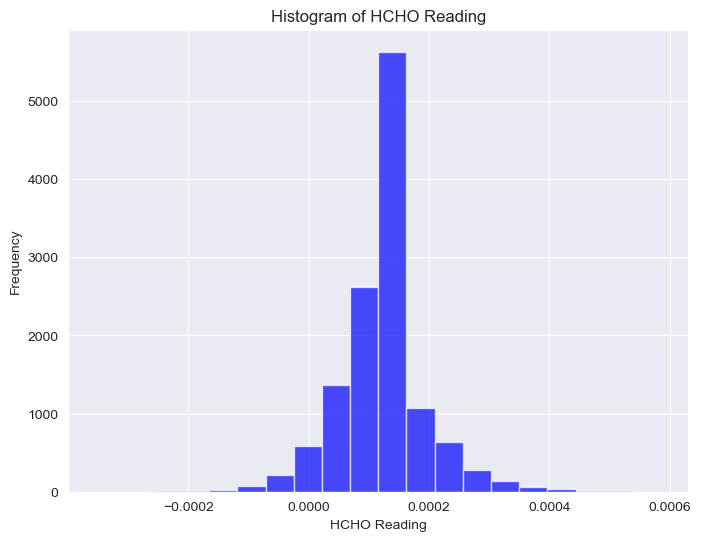

In [113]:
import matplotlib.pyplot as plt

# Visualize data distribution using histograms
plt.figure(figsize=(8, 6))
plt.hist(concatenated_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()

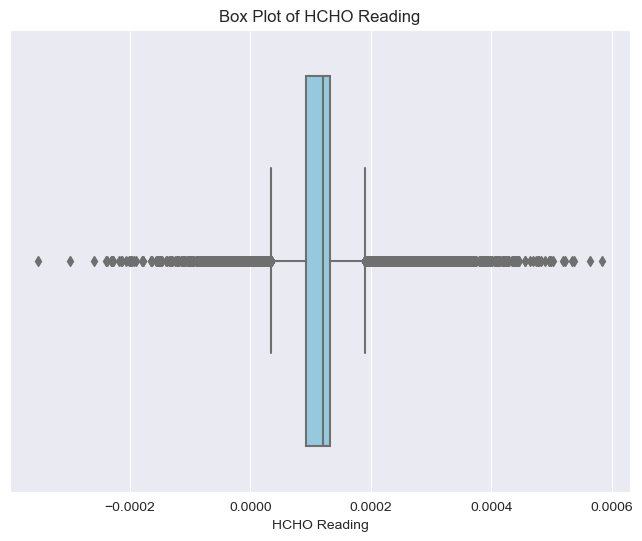

In [114]:
import seaborn as sns
# Visualize data distribution using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=concatenated_df['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.show()

Spatio-Temporal Analysis


In [115]:
import pandas as pd

# Convert date columns to datetime format
concatenated_df['Current Date'] = pd.to_datetime(concatenated_df['Current Date'])
concatenated_df['Next Date'] = pd.to_datetime(concatenated_df['Next Date'])
concatenated_df

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31


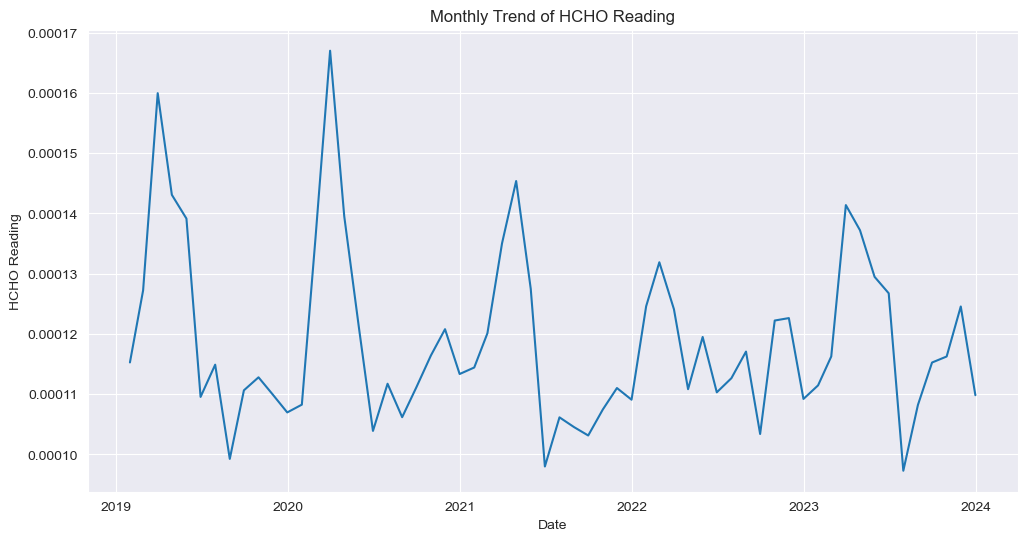

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data based on different time intervals (e.g., monthly)
monthly_data = concatenated_df.resample('M', on='Current Date').mean()  # Resample to monthly frequency

# Visualize trends over time using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_data.index, y=monthly_data['HCHO Reading'])
plt.title('Monthly Trend of HCHO Reading')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.show()

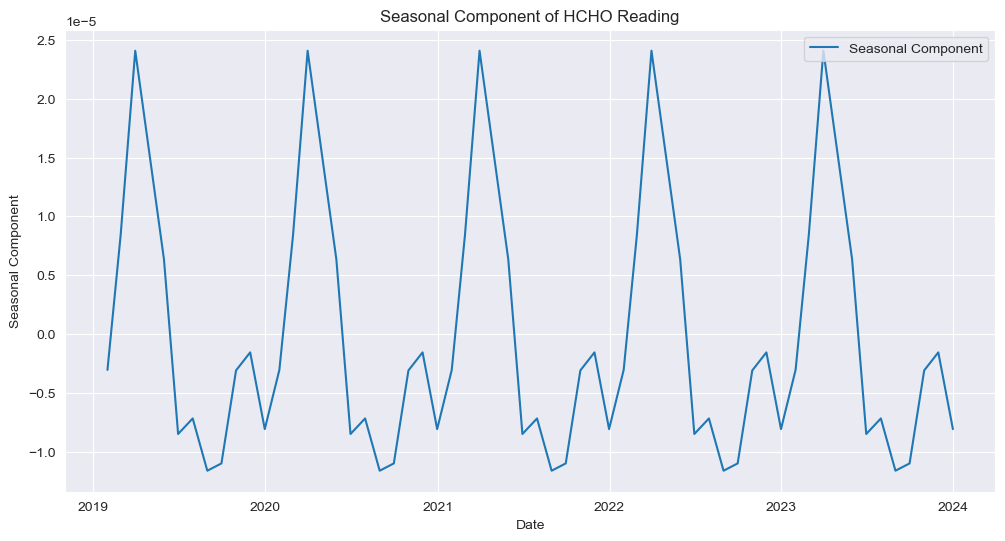

In [117]:
# Identify seasonal variations using seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_data['HCHO Reading'], period=12)  # Assuming a yearly seasonality
seasonal = decomposition.seasonal

# Visualize seasonal variations
plt.figure(figsize=(12, 6))
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonal Component of HCHO Reading')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.legend()
plt.grid(True)
plt.show()

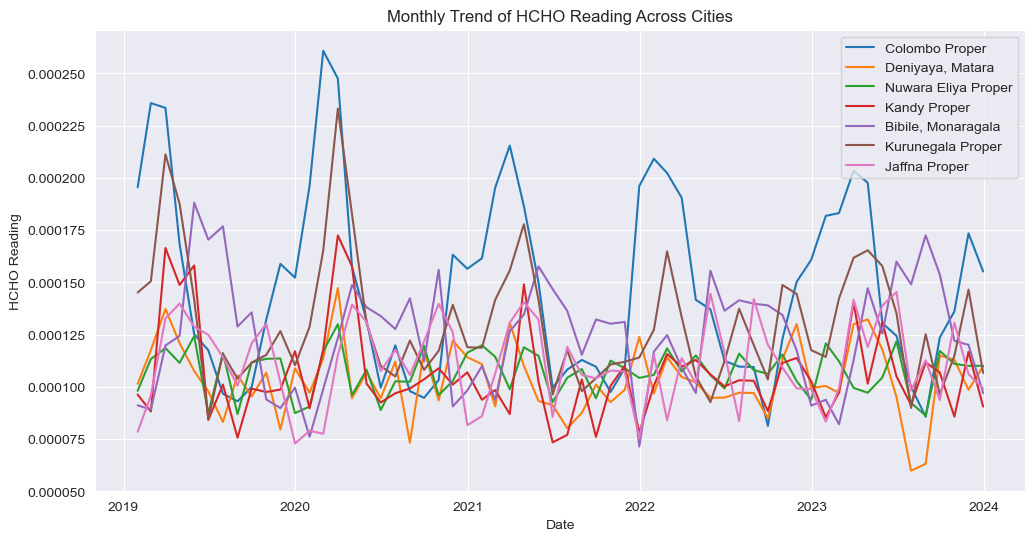

In [118]:
# Compare trends across cities (if applicable)
# Assuming data is grouped by city, you can plot multiple time series on the same plot or create separate plots for each city
# Example:
cities = concatenated_df['Location'].unique()
plt.figure(figsize=(12, 6))
for city in cities:
    city_data = concatenated_df[concatenated_df['Location'] == city]
    city_monthly_data = city_data.resample('M', on='Current Date').mean()
    sns.lineplot(x=city_monthly_data.index, y=city_monthly_data['HCHO Reading'], label=city)
plt.title('Monthly Trend of HCHO Reading Across Cities')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

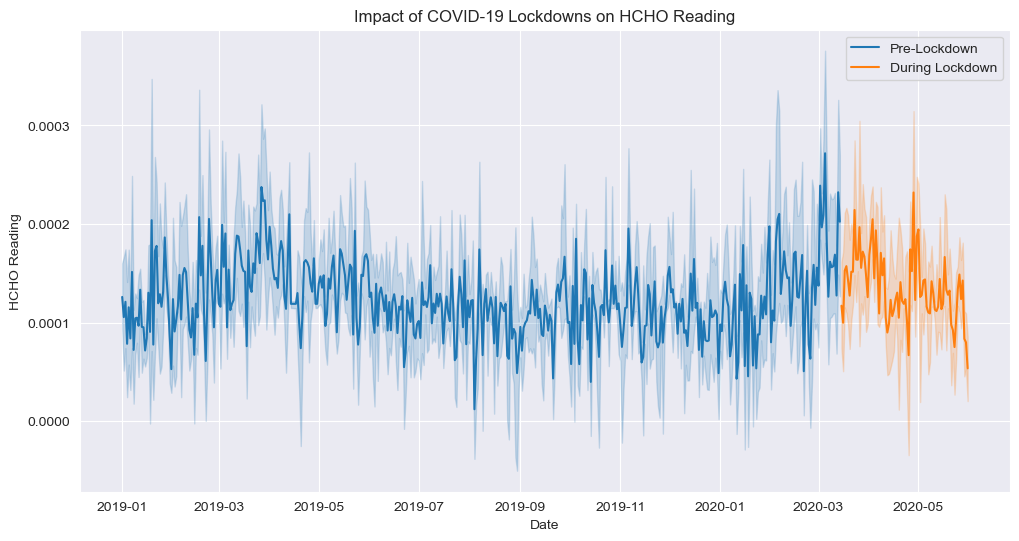

In [119]:
# Analyze impact of COVID-19 lockdowns (if applicable)
# You can filter the data to include only the period during COVID-19 lockdowns and compare it with the period before lockdowns
lockdown_start_date = pd.to_datetime("2020-03-15")
lockdown_end_date = pd.to_datetime("2020-05-31")

lockdown_data = concatenated_df[(concatenated_df['Current Date'] >= lockdown_start_date) & (concatenated_df['Current Date'] <= lockdown_end_date)]
pre_lockdown_data = concatenated_df[concatenated_df['Current Date'] < lockdown_start_date]

# Plot HCHO readings before and during lockdown
plt.figure(figsize=(12, 6))
sns.lineplot(x=pre_lockdown_data['Current Date'], y=pre_lockdown_data['HCHO Reading'], label='Pre-Lockdown')
sns.lineplot(x=lockdown_data['Current Date'], y=lockdown_data['HCHO Reading'], label='During Lockdown')
plt.title('Impact of COVID-19 Lockdowns on HCHO Reading')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
import pandas as pd

concatenated_df['date_column'] = pd.to_datetime(concatenated_df['Current Date'])

earliest_date = concatenated_df['Current Date'].min()
latest_date = concatenated_df['Current Date'].max()

print("Date Range:", earliest_date.date(), "to", latest_date.date())

Date Range: 2019-01-01 to 2023-12-31


In [121]:
external_data = pd.read_csv("external_data.csv")
external_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0
...,...,...,...,...,...,...,...,...,...,...
8740,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0
8741,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN
8742,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0
8743,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN


In [122]:
external_data['date'] = pd.to_datetime(external_data['DATE'])

# Filter data for the specified date range
start_date = '2019-01-01'
end_date = '2023-12-31'

filtered_data = external_data[(external_data['date'] >= start_date) & (external_data['date'] <= end_date)]

In [123]:
external_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    8745 non-null   object        
 1   NAME       8745 non-null   object        
 2   LATITUDE   8745 non-null   float64       
 3   LONGITUDE  8745 non-null   float64       
 4   ELEVATION  8745 non-null   float64       
 5   DATE       8745 non-null   object        
 6   PRCP       8708 non-null   float64       
 7   TAVG       8745 non-null   int64         
 8   TMAX       7786 non-null   float64       
 9   TMIN       7099 non-null   float64       
 10  date       8745 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 751.6+ KB


In [124]:
# Convert column names to lowercase
external_data.columns = external_data.columns.str.lower()
external_data

,station,name,latitude,longitude,elevation,date,prcp,tavg,tmax,tmin,date
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0,2019-01-02
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0,2019-01-03
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0,2019-01-04
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0,2019-01-05
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0,2019-01-06
...,...,...,...,...,...,...,...,...,...,...,...
8740,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0,2023-12-27
8741,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN,2023-12-28
8742,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0,2023-12-29
8743,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN,2023-12-30


In [125]:
# Convert all data to lowercase
external_data = external_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
external_data

,station,name,latitude,longitude,elevation,date,prcp,tavg,tmax,tmin,date
0,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0,2019-01-02
1,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0,2019-01-03
2,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0,2019-01-04
3,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0,2019-01-05
4,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0,2019-01-06
...,...,...,...,...,...,...,...,...,...,...,...
8740,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0,2023-12-27
8741,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN,2023-12-28
8742,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0,2023-12-29
8743,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN,2023-12-30


In [126]:
unique_values = external_data['name'].unique()

print(unique_values)

['kurunegala, ce' 'china bay, ce' 'colombo, ce' 'nuwara eliya, ce'
 'puttalam, ce']


In [127]:
concatenated_df

,HCHO Reading,Location,Current Date,Next Date,date_column
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019-01-01
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019-01-02
2,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019-01-03
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019-01-04
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28,2023-12-27
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29,2023-12-28
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30,2023-12-29
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31,2023-12-30


In [128]:
external_data.rename(columns={'name': 'Location', 'date': 'Current Date'}, inplace=True)
external_data

,station,Location,latitude,longitude,elevation,Current Date,prcp,tavg,tmax,tmin,Current Date
0,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0,2019-01-02
1,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0,2019-01-03
2,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0,2019-01-04
3,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0,2019-01-05
4,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0,2019-01-06
...,...,...,...,...,...,...,...,...,...,...,...
8740,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0,2023-12-27
8741,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN,2023-12-28
8742,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0,2023-12-29
8743,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN,2023-12-30


In [129]:
# Check for missing values in the entire DataFrame
missing_values_total = external_data.isna().sum()

print("Missing Values in Each Column:")
print(missing_values_total)

Missing Values in Each Column:
station            0
Location           0
latitude           0
longitude          0
elevation          0
Current Date       0
prcp              37
tavg               0
tmax             959
tmin            1646
Current Date       0
dtype: int64


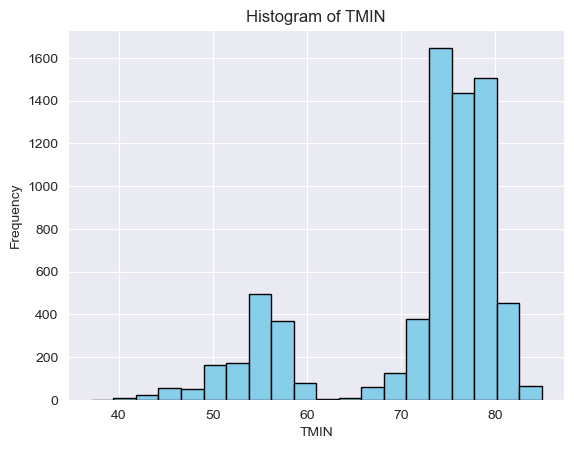

In [130]:
# Filter out NaN values in the 'TMIN' column
tmin_values = external_data['tmin'].dropna()

# Create the histogram
plt.hist(tmin_values, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMIN')
plt.ylabel('Frequency')
plt.title('Histogram of TMIN')

# Show the plot
plt.show()

In [131]:
# Assuming 'external_data' is your DataFrame

# Generate statistical report for the 'TMIN' column
tmin_report = external_data['tmin'].describe()

print("Statistical Report for TMIN Column:")
print(tmin_report)


Statistical Report for TMIN Column:
count    7099.000000
mean       71.878856
std         9.451779
min        37.000000
25%        72.000000
50%        75.000000
75%        78.000000
max        85.000000
Name: tmin, dtype: float64


In [132]:
# Filling null values in the 'TMIN' column with the mean value
mean_tmin = external_data['tmin'].mean()
external_data['tmin'] = external_data['tmin'].fillna(mean_tmin)

In [133]:
tmin_report_updated = external_data['tmin'].describe()
print("Updated Statistical Report for TMIN Column:")
print(tmin_report_updated)

Updated Statistical Report for TMIN Column:
count    8745.000000
mean       71.878856
std         8.515820
min        37.000000
25%        71.878856
50%        74.000000
75%        77.000000
max        85.000000
Name: tmin, dtype: float64


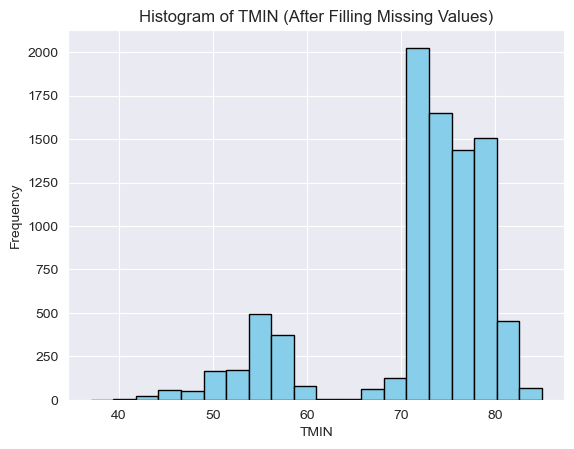

In [134]:
import matplotlib.pyplot as plt

# Create the histogram for the 'TMIN' column
plt.hist(external_data['tmin'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMIN')
plt.ylabel('Frequency')
plt.title('Histogram of TMIN (After Filling Missing Values)')

# Show the plot
plt.show()


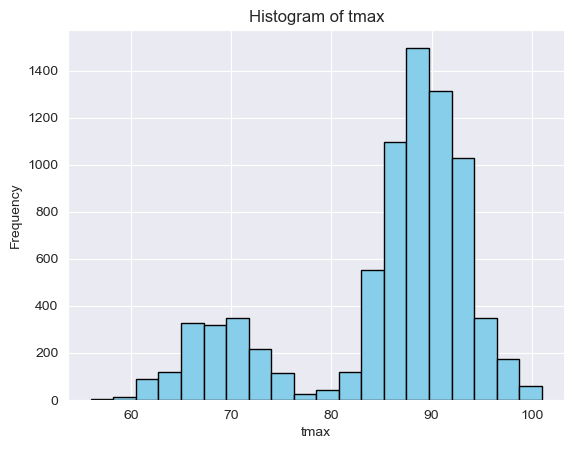

In [135]:
# Filter out NaN values in the 'TMIN' column
tmax_values = external_data['tmax'].dropna()

# Create the histogram
plt.hist(tmax_values, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('tmax')
plt.ylabel('Frequency')
plt.title('Histogram of tmax')

# Show the plot
plt.show()

In [136]:
# Assuming 'external_data' is your DataFrame

# Generate statistical report for the 'TMIN' column
tmax_report = external_data['tmax'].describe()

print("Statistical Report for tmax Column:")
print(tmax_report)

Statistical Report for tmax Column:
count    7786.000000
mean       85.329951
std         9.064695
min        56.000000
25%        84.000000
50%        88.000000
75%        91.000000
max       101.000000
Name: tmax, dtype: float64


In [137]:
mean_tmax = external_data['tmax'].mean()
external_data['tmax'] = external_data['tmax'].fillna(mean_tmax)

# Print the updated statistical report for 'TMAX' column
tmax_report_updated = external_data['tmax'].describe()
print("Updated Statistical Report for TMAX Column:")
print(tmax_report_updated)


Updated Statistical Report for TMAX Column:
count    8745.000000
mean       85.329951
std         8.553177
min        56.000000
25%        85.000000
50%        88.000000
75%        90.000000
max       101.000000
Name: tmax, dtype: float64


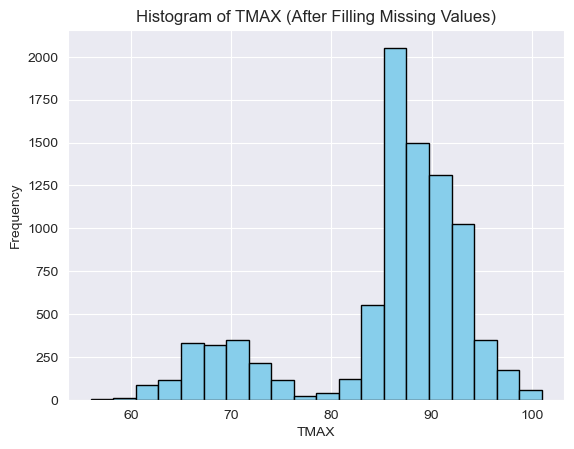

In [138]:
import matplotlib.pyplot as plt

# Create the histogram for the 'TMAX' column
plt.hist(external_data['tmax'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMAX')
plt.ylabel('Frequency')
plt.title('Histogram of TMAX (After Filling Missing Values)')

# Show the plot
plt.show()

In [139]:
external_data.isnull().sum()

station          0
Location         0
latitude         0
longitude        0
elevation        0
Current Date     0
prcp            37
tavg             0
tmax             0
tmin             0
Current Date     0
dtype: int64

In [140]:
# Drop rows where 'prcp' column has NaN values
external_data.dropna(subset=['prcp'], inplace=True)

# Drop rows where 'tavg' column has 0 values
external_data = external_data[external_data['tavg'] != 0]

# Drop rows where 'tmax' column has 0 values
external_data = external_data[external_data['tmax'] != 0]

# Verify the changes
print(external_data)

          station        Location  latitude  longitude  elevation  \
0     cem00043441  kurunegala, ce     7.467     80.367      116.0   
1     cem00043441  kurunegala, ce     7.467     80.367      116.0   
2     cem00043441  kurunegala, ce     7.467     80.367      116.0   
3     cem00043441  kurunegala, ce     7.467     80.367      116.0   
4     cem00043441  kurunegala, ce     7.467     80.367      116.0   
...           ...             ...       ...        ...        ...   
8740  cem00043424    puttalam, ce     8.033     79.833        2.0   
8741  cem00043424    puttalam, ce     8.033     79.833        2.0   
8742  cem00043424    puttalam, ce     8.033     79.833        2.0   
8743  cem00043424    puttalam, ce     8.033     79.833        2.0   
8744  cem00043424    puttalam, ce     8.033     79.833        2.0   

     Current Date  prcp  tavg       tmax       tmin Current Date  
0      2019-01-02  0.00    78  85.329951  72.000000   2019-01-02  
1      2019-01-03  0.00    81  87.000

In [141]:
external_data.isnull().sum()

station         0
Location        0
latitude        0
longitude       0
elevation       0
Current Date    0
prcp            0
tavg            0
tmax            0
tmin            0
Current Date    0
dtype: int64

In [142]:
external_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 8744
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       8708 non-null   object        
 1   Location      8708 non-null   object        
 2   latitude      8708 non-null   float64       
 3   longitude     8708 non-null   float64       
 4   elevation     8708 non-null   float64       
 5   Current Date  8708 non-null   object        
 6   prcp          8708 non-null   float64       
 7   tavg          8708 non-null   int64         
 8   tmax          8708 non-null   float64       
 9   tmin          8708 non-null   float64       
 10  Current Date  8708 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 816.4+ KB


In [143]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12777 entries, 0 to 12776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  12777 non-null  float64       
 1   Location      12777 non-null  object        
 2   Current Date  12777 non-null  datetime64[ns]
 3   Next Date     12777 non-null  datetime64[ns]
 4   date_column   12777 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 499.2+ KB


In [144]:
print(external_data)

          station        Location  latitude  longitude  elevation  \
0     cem00043441  kurunegala, ce     7.467     80.367      116.0   
1     cem00043441  kurunegala, ce     7.467     80.367      116.0   
2     cem00043441  kurunegala, ce     7.467     80.367      116.0   
3     cem00043441  kurunegala, ce     7.467     80.367      116.0   
4     cem00043441  kurunegala, ce     7.467     80.367      116.0   
...           ...             ...       ...        ...        ...   
8740  cem00043424    puttalam, ce     8.033     79.833        2.0   
8741  cem00043424    puttalam, ce     8.033     79.833        2.0   
8742  cem00043424    puttalam, ce     8.033     79.833        2.0   
8743  cem00043424    puttalam, ce     8.033     79.833        2.0   
8744  cem00043424    puttalam, ce     8.033     79.833        2.0   

     Current Date  prcp  tavg       tmax       tmin Current Date  
0      2019-01-02  0.00    78  85.329951  72.000000   2019-01-02  
1      2019-01-03  0.00    81  87.000

In [145]:
print(concatenated_df)

       HCHO Reading        Location Current Date  Next Date date_column
0          0.000197  Colombo Proper   2019-01-01 2019-01-02  2019-01-01
1          0.000263  Colombo Proper   2019-01-02 2019-01-03  2019-01-02
2          0.000099  Colombo Proper   2019-01-03 2019-01-04  2019-01-03
3          0.000210  Colombo Proper   2019-01-04 2019-01-05  2019-01-04
4          0.000179  Colombo Proper   2019-01-05 2019-01-06  2019-01-05
...             ...             ...          ...        ...         ...
12772      0.000122   Jaffna Proper   2023-12-27 2023-12-28  2023-12-27
12773      0.000051   Jaffna Proper   2023-12-28 2023-12-29  2023-12-28
12774      0.000127   Jaffna Proper   2023-12-29 2023-12-30  2023-12-29
12775      0.000117   Jaffna Proper   2023-12-30 2023-12-31  2023-12-30
12776      0.000065   Jaffna Proper   2023-12-31 2024-01-01  2023-12-31

[12777 rows x 5 columns]


In [146]:
# Assuming your DataFrame is named df
location_mapping = {
    'kurunegala, ce': 'kurunegala',
    'china bay, ce': 'new_china_bay',
    'colombo, ce': 'colombo',
    'nuwara eliya, ce': 'nuwara_eliya',
    'puttalam, ce': 'puttalam'
}

external_data['Location'] = external_data['Location'].replace(location_mapping)

# Check the DataFrame to verify the changes
print(external_data)

          station    Location  latitude  longitude  elevation Current Date  \
0     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-02   
1     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-03   
2     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-04   
3     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-05   
4     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-06   
...           ...         ...       ...        ...        ...          ...   
8740  cem00043424    puttalam     8.033     79.833        2.0   2023-12-27   
8741  cem00043424    puttalam     8.033     79.833        2.0   2023-12-28   
8742  cem00043424    puttalam     8.033     79.833        2.0   2023-12-29   
8743  cem00043424    puttalam     8.033     79.833        2.0   2023-12-30   
8744  cem00043424    puttalam     8.033     79.833        2.0   2023-12-31   

      prcp  tavg       tmax       tmin Current Date  
0     0.0

In [147]:
# Assuming your DataFrame is named df
new_location_names = {
    'Colombo Proper': 'colombo',
    'Deniyaya, Matara': 'matara',
    'Nuwara Eliya Proper': 'nuwara_eliya',
    'Kandy Proper': 'kandy',
    'Bibile, Monaragala': 'monaragala',
    'Kurunegala Proper': 'kurunegala',
    'Jaffna Proper': 'jaffna'
}

concatenated_df['Location'] = concatenated_df['Location'].replace(new_location_names)

# Check the DataFrame to verify the changes
print(concatenated_df)


       HCHO Reading Location Current Date  Next Date date_column
0          0.000197  colombo   2019-01-01 2019-01-02  2019-01-01
1          0.000263  colombo   2019-01-02 2019-01-03  2019-01-02
2          0.000099  colombo   2019-01-03 2019-01-04  2019-01-03
3          0.000210  colombo   2019-01-04 2019-01-05  2019-01-04
4          0.000179  colombo   2019-01-05 2019-01-06  2019-01-05
...             ...      ...          ...        ...         ...
12772      0.000122   jaffna   2023-12-27 2023-12-28  2023-12-27
12773      0.000051   jaffna   2023-12-28 2023-12-29  2023-12-28
12774      0.000127   jaffna   2023-12-29 2023-12-30  2023-12-29
12775      0.000117   jaffna   2023-12-30 2023-12-31  2023-12-30
12776      0.000065   jaffna   2023-12-31 2024-01-01  2023-12-31

[12777 rows x 5 columns]


In [148]:
un = concatenated_df['Location'].unique()
print(un)

['colombo' 'matara' 'nuwara_eliya' 'kandy' 'monaragala' 'kurunegala'
 'jaffna']


In [149]:
cy = external_data['Location'].unique()

print(cy)

['kurunegala' 'new_china_bay' 'colombo' 'nuwara_eliya' 'puttalam']


In [150]:
import pandas as pd

# Assuming your datasets are named df1 and df2
# First, filter the first dataset based on location
filtered_df1 = concatenated_df[concatenated_df['Location'].isin(['colombo', 'matara', 'nuwara_eliya', 'kandy', 'monaragala', 'kurunegala', 'jaffna'])]

# Next, filter the second dataset based on location
filtered_df2 = external_data[external_data['Location'].isin(['colombo', 'nuwara_eliya', 'kurunegala', 'new_china_bay', 'puttalam'])]

# Merge the filtered datasets on the 'Location' column
merged_df = pd.merge(filtered_df1, filtered_df2, on='Location')

# Check the merged DataFrame
print(merged_df)

         HCHO Reading    Location Current Date_x  Next Date date_column  \
0            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
1            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
2            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
3            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
4            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
...               ...         ...            ...        ...         ...   
9517177      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   
9517178      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   
9517179      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   
9517180      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   
9517181      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   

             station  latitude  longitude  elevation Current Date_y  prcp  \
0        cem00043466  

In [151]:
c = merged_df['Location'].unique()

print(c)

['colombo' 'nuwara_eliya' 'kurunegala']


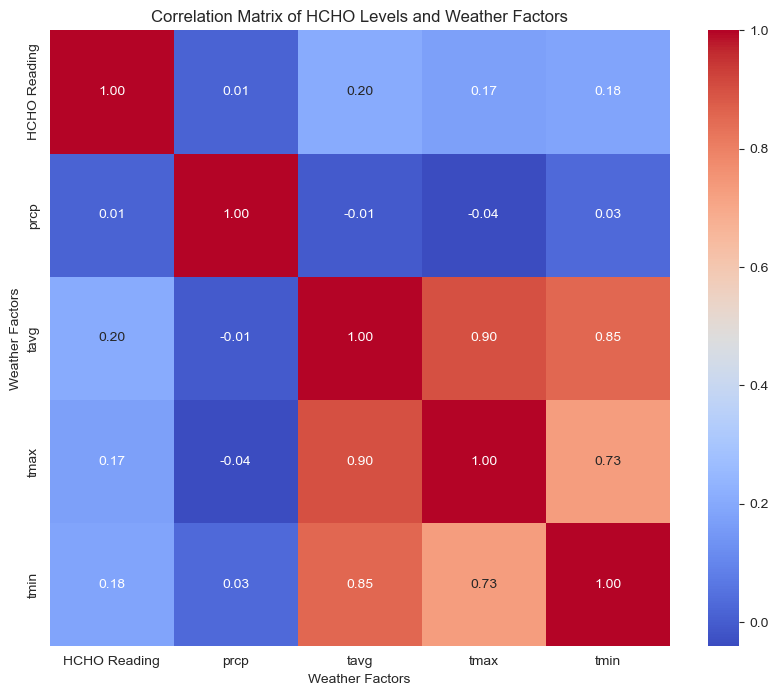

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
# Now you can analyze the correlation between HCHO levels and weather factors
correlation_matrix = merged_df[['HCHO Reading', 'prcp', 'tavg', 'tmax', 'tmin']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of HCHO Levels and Weather Factors')
plt.xlabel('Weather Factors')
plt.ylabel('Weather Factors')
plt.show()


In [153]:
print(correlation_matrix)

              HCHO Reading      prcp      tavg      tmax      tmin
HCHO Reading      1.000000  0.014237  0.203742  0.173650  0.183548
prcp              0.014237  1.000000 -0.006611 -0.041072  0.031723
tavg              0.203742 -0.006611  1.000000  0.899428  0.853706
tmax              0.173650 -0.041072  0.899428  1.000000  0.728290
tmin              0.183548  0.031723  0.853706  0.728290  1.000000


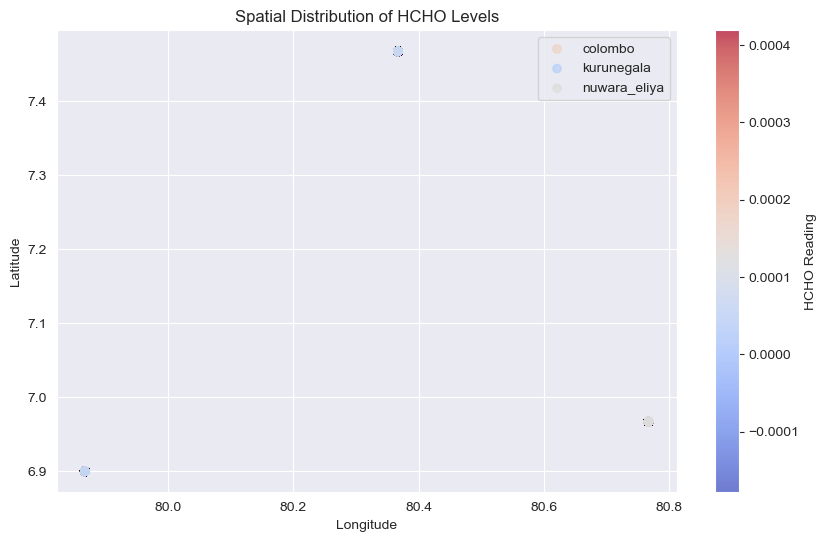

In [154]:
import matplotlib.pyplot as plt

# Plot HCHO levels for each city
plt.figure(figsize=(10, 6))
for city, color in zip(['colombo', 'kurunegala', 'nuwara_eliya'], ['red', 'blue', 'green']):
    city_data = merged_df[merged_df['Location'] == city]
    plt.scatter(city_data['longitude'], city_data['latitude'], c=city_data['HCHO Reading'], cmap='coolwarm', label=city, alpha=0.7)

plt.colorbar(label='HCHO Reading')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of HCHO Levels')
plt.legend()
plt.show()


In [155]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'concatenated_df' is the preprocessed DataFrame

# Split the data into training and validation sets
train_size = int(len(concatenated_df) * 0.8)
train, test = concatenated_df['HCHO Reading'][:train_size], concatenated_df['HCHO Reading'][train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5,1,0))  # Example order, adjust as needed
model_fit = model.fit()

# Forecast
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [156]:
# Evaluate the model
mse = mean_squared_error(test, forecast)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 5.253048229151183e-09


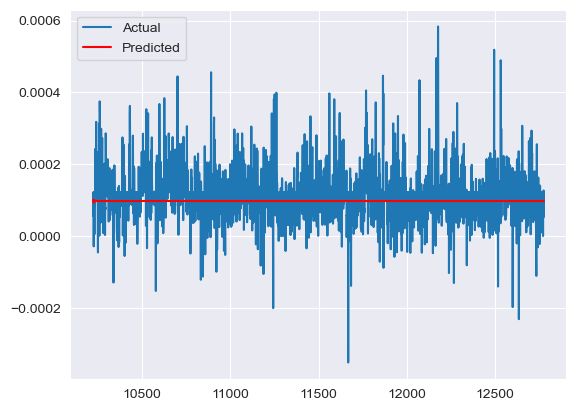

In [157]:
# Visualize the actual vs. predicted values
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, color='red', label='Predicted')
plt.legend()
plt.show()

In [158]:

# Forecast future HCHO levels
future_forecast_steps = 30  # Adjust as needed
future_forecast = model_fit.forecast(steps=future_forecast_steps)
print('Future forecast:', future_forecast)

Future forecast: 10221    0.000100
10222    0.000100
10223    0.000100
10224    0.000095
10225    0.000093
10226    0.000101
10227    0.000098
10228    0.000098
10229    0.000097
10230    0.000097
10231    0.000097
10232    0.000098
10233    0.000098
10234    0.000097
10235    0.000097
10236    0.000097
10237    0.000098
10238    0.000098
10239    0.000097
10240    0.000097
10241    0.000097
10242    0.000097
10243    0.000098
10244    0.000098
10245    0.000097
10246    0.000097
10247    0.000097
10248    0.000097
10249    0.000098
10250    0.000097
Name: predicted_mean, dtype: float64
